In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load the Iris dataset from CSV
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the uploaded Iris dataset
df = pd.read_csv('iris.csv')

# Drop 'Id' column if it exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Rename columns for consistency
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Encode the species labels to numeric values
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Separate features and labels
X = df.drop('species', axis=1)
y = df['species']
target_names = le.classes_  # ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']



In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [7]:
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")


K=1, Accuracy=0.9667
K=2, Accuracy=1.0000
K=3, Accuracy=1.0000
K=4, Accuracy=1.0000
K=5, Accuracy=1.0000
K=6, Accuracy=1.0000
K=7, Accuracy=1.0000
K=8, Accuracy=1.0000
K=9, Accuracy=1.0000
K=10, Accuracy=1.0000
K=11, Accuracy=1.0000
K=12, Accuracy=1.0000
K=13, Accuracy=1.0000
K=14, Accuracy=1.0000
K=15, Accuracy=1.0000
K=16, Accuracy=1.0000
K=17, Accuracy=1.0000
K=18, Accuracy=0.9667
K=19, Accuracy=0.9667
K=20, Accuracy=0.9667


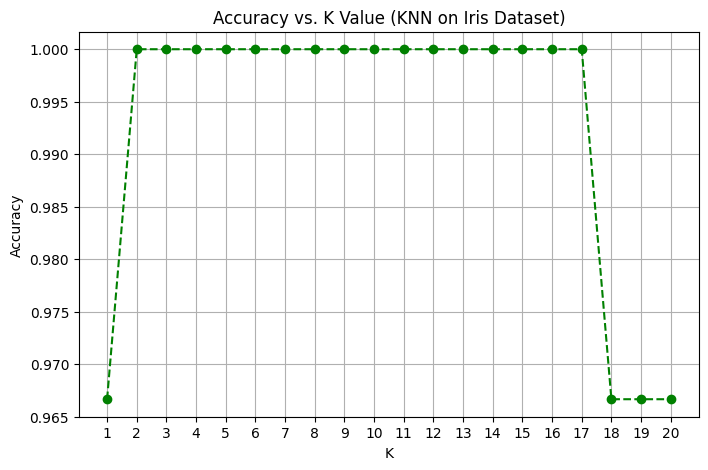

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='green')
plt.title("Accuracy vs. K Value (KNN on Iris Dataset)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_range)
plt.show()


In [9]:
best_k = k_range[np.argmax(accuracies)]
print(f"\n✅ Best K Value: {best_k}")

# Train with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)



✅ Best K Value: 2


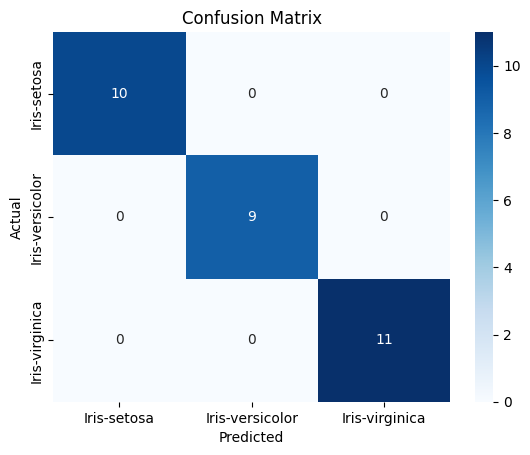


📊 Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred_final, target_names=target_names))


In [11]:
cv_scores = cross_val_score(knn_final, X_scaled, y, cv=5)
print(f"🧪 Cross-Validation Accuracy (5-fold): {cv_scores.mean():.4f}")


🧪 Cross-Validation Accuracy (5-fold): 0.9467


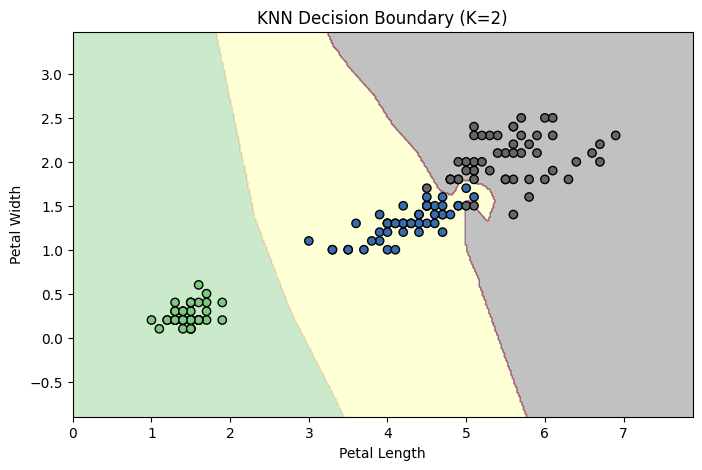

In [12]:
# Use only petal_length and petal_width for visualization
X_2D = df[['petal_length', 'petal_width']].values
y_2D = df['species']

# Train-test split
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(
    X_2D, y_2D, test_size=0.2, random_state=42)

knn_2D = KNeighborsClassifier(n_neighbors=best_k)
knn_2D.fit(X_train_2D, y_train_2D)

# Meshgrid for boundary
h = 0.02
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Accent')
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y_2D, cmap='Accent', edgecolor='k')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.show()


# New Section